<a href="https://colab.research.google.com/github/Dheemanth-Chowdary/Prodigy-Internship/blob/main/Prodigy_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')


<ipython-input-5-793dab682c1f>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
<ipython-input-5-793dab682c1f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette="viridis")


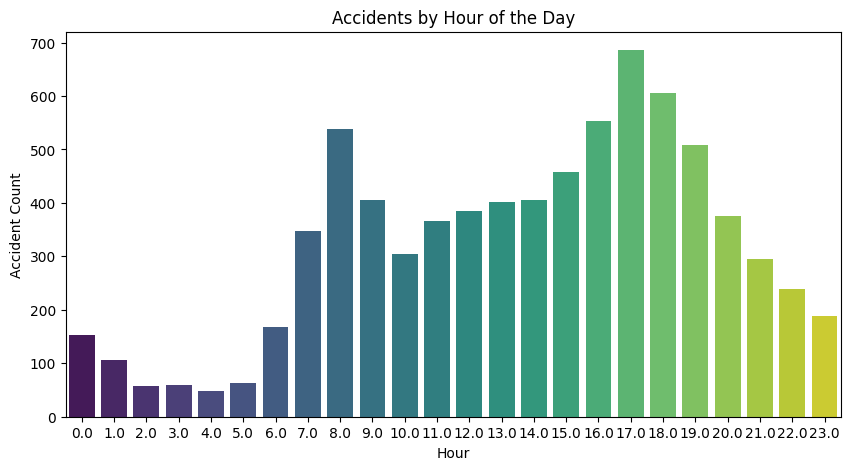

<ipython-input-5-793dab682c1f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette="coolwarm")


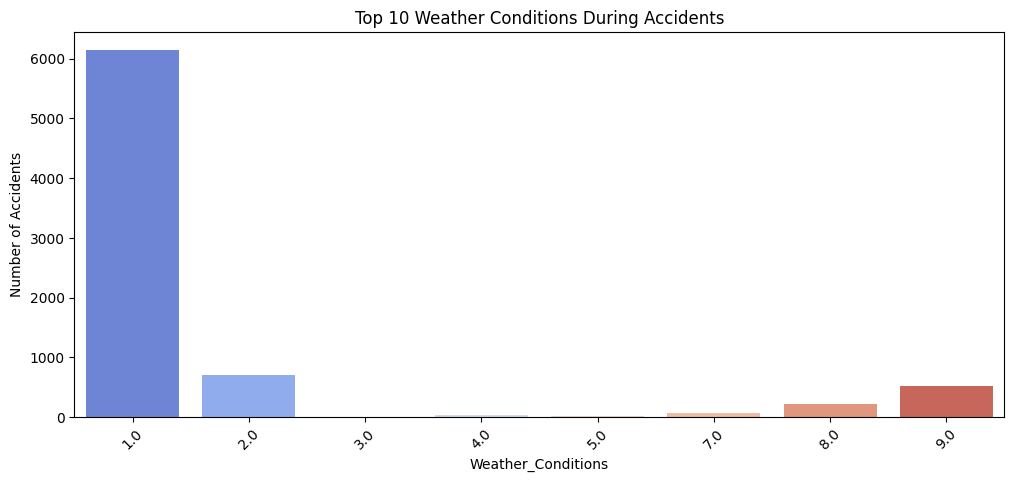

<ipython-input-5-793dab682c1f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=order, palette="Set2")


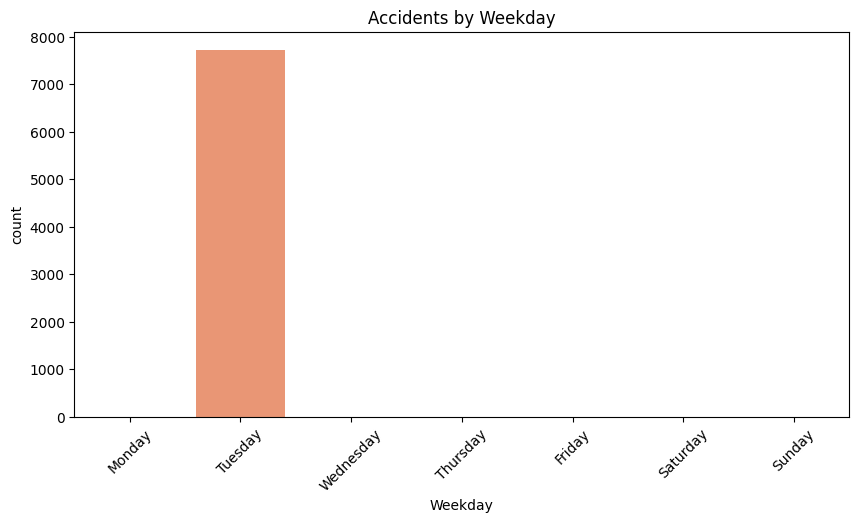

Accident hotspot map saved as 'accident_hotspots.html'


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import folium

df = pd.read_csv("/content/Accidents1.csv")

# Print the column names to verify the correct name
print(df.columns)

# Once you identify the correct column name from the output above,
# replace 'Start_Time' with the actual column name in the following lines
# For example, if the column is named 'Start Time', you would change the line to:
# df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Weekday'] = df['Time'].dt.day_name()
df['Month'] = df['Time'].dt.month_name()

plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette="viridis")
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.show()

top_weather = df['Weather_Conditions'].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_weather.index, y=top_weather.values, palette="coolwarm")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=order, palette="Set2")
plt.title("Accidents by Weekday")
plt.xticks(rotation=45)
plt.show()

# Reduce the sample size as the original DataFrame likely has less than 10000 rows
# after dropping NA values in Latitude and Longitude.
heatmap_data = df[['Latitude', 'Longitude']].dropna().sample(n=5000, random_state=42) # Changed n to 5000
accident_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
HeatMap(heatmap_data.values, radius=8).add_to(accident_map)
accident_map.save("accident_hotspots.html")
print("Accident hotspot map saved as 'accident_hotspots.html'")